### Importing required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder


### Importing the CSV file

In [2]:
data = pd.read_csv("H2HBABBA3163.csv")

#### Looking at the shape of data

In [3]:
data.shape

(50000, 19)

#### Finding column in which data is not unique

In [4]:
#finding the column which has same value through out the data
unique_cols =  [x for x in data.columns if data[x].nunique()==1] 
print(unique_cols)

['posting_id']


In [5]:
#removing the column with constant data
data.drop(unique_cols,axis=1,inplace=True)
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

#### Finding column which has null data

In [6]:
#finding column with null value
data.isnull().mean()

business_code             0.00000
cust_number               0.00000
name_customer             0.00000
clear_date                0.20000
buisness_year             0.00000
doc_id                    0.00000
posting_date              0.00000
document_create_date      0.00000
document_create_date.1    0.00000
due_in_date               0.00000
invoice_currency          0.00000
document type             0.00000
area_business             1.00000
total_open_amount         0.00000
baseline_create_date      0.00000
cust_payment_terms        0.00000
invoice_id                0.00012
isOpen                    0.00000
dtype: float64

In [7]:
#dropping column with null value
#since area_bussiness has mean 1 it means it is entirely made of null hence it is to be removed.
data.drop(['area_business'],axis=1,inplace=True)
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [8]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR,2019-06-05 00:00:00,2019.0,1.929378e+09,2019-05-26,20190525,20190526,20190610.0,USD,RV,74012.75,20190526.0,NAH4,1.929378e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-02-08 00:00:00,2019.0,1.928703e+09,2019-01-29,20190129,20190129,20190213.0,USD,RV,14148.84,20190129.0,NAH4,1.928703e+09,0
2,U001,0200782001,GORDO trust,NaN,2020.0,1.930571e+09,2020-02-28,20200226,20200228,20200314.0,USD,RV,10314.24,20200228.0,NAA8,1.930571e+09,1
3,U001,0200772670,ASSOCIAT us,2019-07-05 00:00:00,2019.0,1.929517e+09,2019-06-19,20190619,20190619,20190704.0,USD,RV,2952.77,20190619.0,NAU5,1.929517e+09,0
4,U001,CCU002,KRFT FDS co,2019-05-31 00:00:00,2019.0,1.929107e+09,2019-04-10,20190408,20190410,20190515.0,USD,RV,11562.16,20190410.0,NAG2,1.929107e+09,0


#### converting dates in int64 into datetime objects with format yyyy-mm-dd

In [9]:
data['document_create_date'] = pd.to_datetime(data['document_create_date'], format='%Y%m%d')
data['document_create_date.1'] = pd.to_datetime(data['document_create_date.1'], format='%Y%m%d')
data['due_in_date'] = pd.to_datetime(data['due_in_date'], format='%Y%m%d')
data['baseline_create_date'] = pd.to_datetime(data['baseline_create_date'], format='%Y%m%d')
data['clear_date'] = pd.to_datetime(data['clear_date'])
data['posting_date'] = pd.to_datetime(data['posting_date'])
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR,2019-06-05,2019.0,1.929378e+09,2019-05-26,2019-05-25,2019-05-26,2019-06-10,USD,RV,74012.75,2019-05-26,NAH4,1.929378e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-02-08,2019.0,1.928703e+09,2019-01-29,2019-01-29,2019-01-29,2019-02-13,USD,RV,14148.84,2019-01-29,NAH4,1.928703e+09,0
2,U001,0200782001,GORDO trust,NaT,2020.0,1.930571e+09,2020-02-28,2020-02-26,2020-02-28,2020-03-14,USD,RV,10314.24,2020-02-28,NAA8,1.930571e+09,1
3,U001,0200772670,ASSOCIAT us,2019-07-05,2019.0,1.929517e+09,2019-06-19,2019-06-19,2019-06-19,2019-07-04,USD,RV,2952.77,2019-06-19,NAU5,1.929517e+09,0
4,U001,CCU002,KRFT FDS co,2019-05-31,2019.0,1.929107e+09,2019-04-10,2019-04-08,2019-04-10,2019-05-15,USD,RV,11562.16,2019-04-10,NAG2,1.929107e+09,0


#### searching and removing rows with duplicate data

In [10]:
data.duplicated().sum()

1126

In [11]:
data.drop_duplicates(keep='first',inplace=True)

In [12]:
data.shape

(48874, 17)

In [13]:
data.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR,2019-06-05,2019.0,1.929378e+09,2019-05-26,2019-05-25,2019-05-26,2019-06-10,USD,RV,74012.75,2019-05-26,NAH4,1.929378e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-02-08,2019.0,1.928703e+09,2019-01-29,2019-01-29,2019-01-29,2019-02-13,USD,RV,14148.84,2019-01-29,NAH4,1.928703e+09,0
2,U001,0200782001,GORDO trust,NaT,2020.0,1.930571e+09,2020-02-28,2020-02-26,2020-02-28,2020-03-14,USD,RV,10314.24,2020-02-28,NAA8,1.930571e+09,1
3,U001,0200772670,ASSOCIAT us,2019-07-05,2019.0,1.929517e+09,2019-06-19,2019-06-19,2019-06-19,2019-07-04,USD,RV,2952.77,2019-06-19,NAU5,1.929517e+09,0
4,U001,CCU002,KRFT FDS co,2019-05-31,2019.0,1.929107e+09,2019-04-10,2019-04-08,2019-04-10,2019-05-15,USD,RV,11562.16,2019-04-10,NAG2,1.929107e+09,0
5,U001,0200726979,BJ'S corporation,2019-10-23,2019.0,1.929981e+09,2019-10-08,2019-10-07,2019-10-08,2019-10-23,USD,RV,257.30,2019-10-08,NAA8,1.929981e+09,0
6,U001,0200726979,BJ'S trust,2019-06-25,2019.0,1.929461e+09,2019-06-10,2019-06-09,2019-06-10,2019-06-25,USD,RV,1061.39,2019-06-10,NAA8,1.929461e+09,0
7,U001,0200726979,BJ'S llc,NaT,2020.0,1.930688e+09,2020-03-25,2020-03-23,2020-03-25,2020-04-09,USD,RV,39394.40,2020-03-25,NAA8,1.930688e+09,1
8,U001,0200230690,DECA corp,2019-01-15,2019.0,1.928560e+09,2019-01-03,2019-01-03,2019-01-03,2019-01-24,USD,RV,8106.68,2019-01-01,NAM4,1.928560e+09,0
9,U001,0200769623,WAL-MAR corporation,2019-01-18,2019.0,1.928578e+09,2019-01-06,2019-01-05,2019-01-06,2019-01-21,USD,RV,17195.45,2019-01-06,NAH4,1.928578e+09,0


#### creating a column which contains difference between the date it was cleared and the due date

In [14]:
data['datedifference']=(data['clear_date']-data['due_in_date']).dt.days

In [15]:
data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
datedifference                   float64
dtype: object

#### create a column which stores the month of posting date

In [16]:
data['month']=data['posting_date'].dt.month

In [17]:
data.sample(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,datedifference,month
36608,U001,0200230690,DECA systems,2019-09-03,2019.0,1.929762e+09,2019-08-19,2019-08-19,2019-08-19,2019-09-08,USD,RV,136.44,2019-08-16,NAM4,1.929762e+09,0,-5.0,8
17069,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930675e+09,2020-03-20,2020-03-20,2020-03-20,2020-04-04,USD,RV,1695.68,2020-03-20,NAH4,1.930675e+09,1,NaN,3
45138,U001,0200764795,SYSCO llc,2019-07-22,2019.0,1.929559e+09,2019-07-04,2019-06-29,2019-07-04,2019-07-19,USD,RV,31824.34,2019-07-04,NAA8,1.929559e+09,0,3.0,7
46589,U001,0200739006,AL,2019-11-04,2019.0,1.930014e+09,2019-10-15,2019-10-15,2019-10-15,2019-10-30,USD,RV,24294.84,2019-10-15,NAA8,1.930014e+09,0,5.0,10
12915,U001,0200126819,MCLANE corp,2019-12-27,2019.0,1.930260e+09,2019-12-11,2019-12-10,2019-12-11,2019-12-26,USD,RV,34426.68,2019-12-11,NAA8,1.930260e+09,0,1.0,12
3109,U001,0200719300,SYSTEMS systems,2019-07-30,2019.0,1.929521e+09,2019-06-27,2019-06-21,2019-06-27,2019-07-29,USD,RV,12751.80,2019-06-27,NA32,1.929521e+09,0,1.0,6
20101,U001,0200984794,GREA corporation,2019-06-14,2019.0,1.929400e+09,2019-05-29,2019-05-29,2019-05-29,2019-06-13,USD,RV,10043.32,2019-05-29,NAA8,1.929400e+09,0,1.0,5
40220,U001,0200704045,RA llc,2020-01-22,2020.0,1.930372e+09,2020-01-07,2020-01-08,2020-01-07,2020-01-22,USD,RV,21366.40,2020-01-07,NAA8,1.930372e+09,0,0.0,1
8175,U001,0200726979,BJ'S corp,2019-10-02,2019.0,1.929881e+09,2019-09-17,2019-09-16,2019-09-17,2019-10-02,USD,RV,27.60,2019-09-17,NAA8,1.929881e+09,0,0.0,9
18027,U001,0200769623,WAL-MAR associates,2019-07-08,2019.0,1.929521e+09,2019-06-26,2019-06-21,2019-06-26,2019-07-11,USD,RV,19263.74,2019-06-26,NAH4,1.929521e+09,0,-3.0,6


In [18]:
data.nunique()

business_code                 6
cust_number                1422
name_customer              4137
clear_date                  392
buisness_year                 2
doc_id                    48874
posting_date                501
document_create_date        504
document_create_date.1      501
due_in_date                 543
invoice_currency              2
document type                 2
total_open_amount         44199
baseline_create_date        506
cust_payment_terms           75
invoice_id                48868
isOpen                        2
datedifference              179
month                        12
dtype: int64

#### dropping invoice id due to missing values and isopen because it has low data variance

In [19]:
data.drop(['invoice_id'],axis=1,inplace=True)
data.drop(['isOpen'],axis=1,inplace=True)

#### removing outliers in data

In [20]:
#detecting upper and lower limit for outliers of money
factor=3
upper_limit = data['total_open_amount'].mean () + data['total_open_amount'].std () * factor
lower_limit = data['total_open_amount'].mean () - data['total_open_amount'].std () * factor
print(upper_limit,"\n",lower_limit)

150369.37654375815 
 -86151.01485533439


In [21]:
#dropped the outliers
data=data[(data['total_open_amount'] < upper_limit) & (data['total_open_amount'] > lower_limit)]
data.shape

(48162, 17)

In [22]:
#sorting data according to posting date
data.sort_values(by='posting_date',inplace=True)

In [23]:
data.reset_index(inplace=True,drop=True)

In [24]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,datedifference,month
0,U001,0200769623,WAL-MAR foundation,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,5154.91,2018-12-30,NAH4,1.0,12
1,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,4264.18,2018-12-30,NAH4,-5.0,12
2,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,10645.08,2018-12-30,NAH4,-5.0,12
3,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,3978.34,2018-12-30,NAH4,-4.0,12
4,U001,0200729290,KROGER corp,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,16967.72,2018-12-30,NAA8,0.0,12


#### Encoding

In [25]:
name_encoder =LabelEncoder()

data['custnameenc']= name_encoder.fit_transform(data['name_customer'])

In [26]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,datedifference,month,custnameenc
0,U001,0200769623,WAL-MAR foundation,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,5154.91,2018-12-30,NAH4,1.0,12,3990
1,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,4264.18,2018-12-30,NAH4,-5.0,12,3989
2,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,10645.08,2018-12-30,NAH4,-5.0,12,3989
3,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,3978.34,2018-12-30,NAH4,-4.0,12,3988
4,U001,0200729290,KROGER corp,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,16967.72,2018-12-30,NAA8,0.0,12,2160


In [27]:
data.drop(['business_code'],axis=1,inplace=True)
#data.drop(['cust_number'],axis=1,inplace=True)
data.drop(['name_customer'],axis=1,inplace=True)
data.drop(['buisness_year'],axis=1,inplace=True)
data.drop(['doc_id'],axis=1,inplace=True)
data.drop(['document_create_date.1'],axis=1,inplace=True)
data.drop(['cust_payment_terms'],axis=1,inplace=True)
data.drop(['baseline_create_date'],axis=1,inplace=True)
data.drop(['document type'],axis=1,inplace=True)
data.drop(['invoice_currency'],axis=1,inplace=True)
data.drop(['posting_date'],axis=1,inplace=True)
data.drop(['document_create_date'],axis=1,inplace=True)

data.head()

,cust_number,clear_date,due_in_date,total_open_amount,datedifference,month,custnameenc
0,0200769623,2019-01-15,2019-01-14,5154.91,1.0,12,3990
1,0200769623,2019-01-09,2019-01-14,4264.18,-5.0,12,3989
2,0200769623,2019-01-09,2019-01-14,10645.08,-5.0,12,3989
3,0200769623,2019-01-10,2019-01-14,3978.34,-4.0,12,3988
4,0200729290,2019-01-14,2019-01-14,16967.72,0.0,12,2160


In [28]:
#seperating the rows which have no clear_date value to test set
test=data[data['clear_date'].isnull()]
test.shape

(9596, 7)

In [29]:
#removing rows with clear_date null value in dataframe
data=data[data['clear_date'].notnull()]
data.shape

(38566, 7)

In [30]:
data.head()

,cust_number,clear_date,due_in_date,total_open_amount,datedifference,month,custnameenc
0,0200769623,2019-01-15,2019-01-14,5154.91,1.0,12,3990
1,0200769623,2019-01-09,2019-01-14,4264.18,-5.0,12,3989
2,0200769623,2019-01-09,2019-01-14,10645.08,-5.0,12,3989
3,0200769623,2019-01-10,2019-01-14,3978.34,-4.0,12,3988
4,0200729290,2019-01-14,2019-01-14,16967.72,0.0,12,2160


In [31]:
cut_labels = ['<0','0 to 15','15 to 30','30 to 200']
cut_bins =[-200,0,15,30,200]
data['date diff bucket'] = pd.cut(data['datedifference'], bins=cut_bins, labels = cut_labels)

In [32]:
data.head()

,cust_number,clear_date,due_in_date,total_open_amount,datedifference,month,custnameenc,date diff bucket
0,0200769623,2019-01-15,2019-01-14,5154.91,1.0,12,3990,0 to 15
1,0200769623,2019-01-09,2019-01-14,4264.18,-5.0,12,3989,<0
2,0200769623,2019-01-09,2019-01-14,10645.08,-5.0,12,3989,<0
3,0200769623,2019-01-10,2019-01-14,3978.34,-4.0,12,3988,<0
4,0200729290,2019-01-14,2019-01-14,16967.72,0.0,12,2160,<0


In [33]:
data.dtypes

cust_number                  object
clear_date           datetime64[ns]
due_in_date          datetime64[ns]
total_open_amount           float64
datedifference              float64
month                         int64
custnameenc                   int32
date diff bucket           category
dtype: object

In [34]:
data.head()

,cust_number,clear_date,due_in_date,total_open_amount,datedifference,month,custnameenc,date diff bucket
0,0200769623,2019-01-15,2019-01-14,5154.91,1.0,12,3990,0 to 15
1,0200769623,2019-01-09,2019-01-14,4264.18,-5.0,12,3989,<0
2,0200769623,2019-01-09,2019-01-14,10645.08,-5.0,12,3989,<0
3,0200769623,2019-01-10,2019-01-14,3978.34,-4.0,12,3988,<0
4,0200729290,2019-01-14,2019-01-14,16967.72,0.0,12,2160,<0


### Splitting the data

In [35]:
X_train, X_test,Y_train,Y_test = train_test_split(data.drop(['datedifference','date diff bucket','due_in_date','clear_date','cust_number'],axis=1),data['datedifference'],test_size=.25,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((28924, 3), (9642, 3), (28924,), (9642,))

In [36]:
X_train.head(10)

,total_open_amount,month,custnameenc
6445,23176.25,3,3994
11849,31132.09,5,2713
22306,14010.06,8,3189
32143,122398.37,12,2162
9870,17261.29,4,3991
5145,344.93,2,3994
11854,97601.51,5,3981
37794,13710.71,2,4075
16883,15329.56,6,122
971,24912.00,1,2095


### EDA[exploratory data analysis]

In [37]:
X_train.nunique()

total_open_amount    26506
month                   12
custnameenc           3374
dtype: int64

In [38]:
X_train.dtypes

total_open_amount    float64
month                  int64
custnameenc            int32
dtype: object

In [39]:
X_train['total_open_amount'].describe()

count     28924.000000
mean      29074.482915
std       32037.412128
min           4.290000
25%        4370.080000
50%       16769.635000
75%       44447.875000
max      150322.210000
Name: total_open_amount, dtype: float64

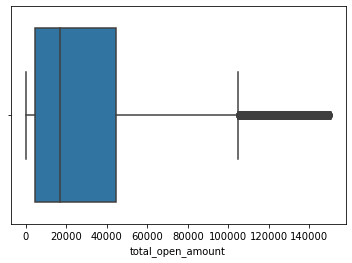

In [40]:
sns.boxplot(X_train['total_open_amount'])

the amount borrowed is always near to 20000

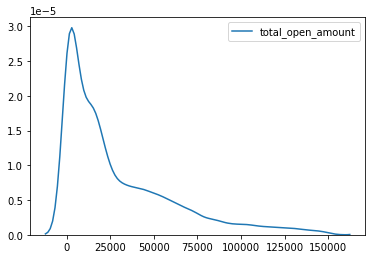

In [41]:
sns.kdeplot(X_train['total_open_amount'])

Graph is right skewed

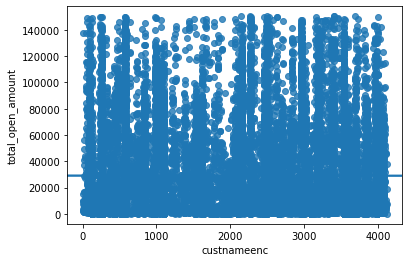

In [42]:
sns.regplot(x=X_train["custnameenc"], y=X_train["total_open_amount"])

In [43]:
X_train.corr()

,total_open_amount,month,custnameenc
total_open_amount,1.000000,0.022510,-0.000704
month,0.022510,1.000000,0.011347
custnameenc,-0.000704,0.011347,1.000000


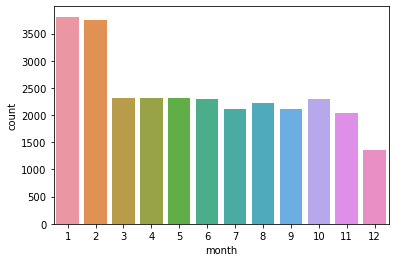

In [44]:
sns.countplot(X_train['month'])

most of the business is done in january and feburary

### feature selection

In [45]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
#the number of non-constant features.
len(X_train.columns[constant_filter.get_support()])

3

In [46]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


In [47]:
X_train.shape

(28924, 3)

In [48]:
X_train_T = X_train.T
# print the number of duplicated features
print(X_train_T.duplicated().sum())
# select the duplicated features columns names
duplicated_columns = X_train_T[X_train_T.duplicated()].index.values

0


In [49]:
duplicated_columns

array([], dtype=object)

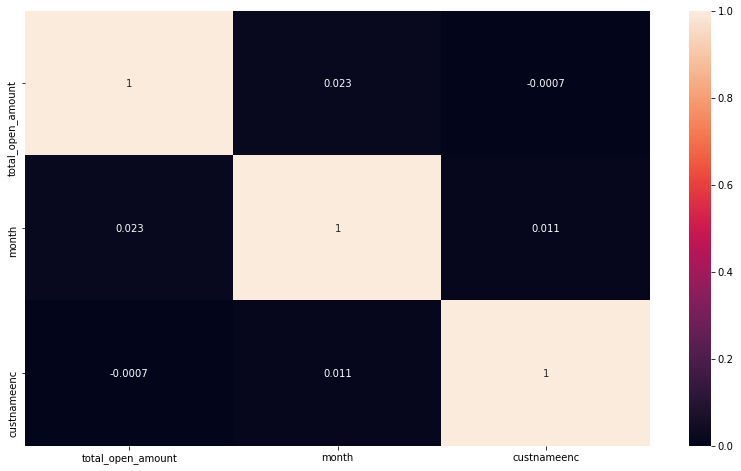

In [50]:
corr=X_train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

In [51]:
def tree_based_feature_importance(x_train,y_train):

    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

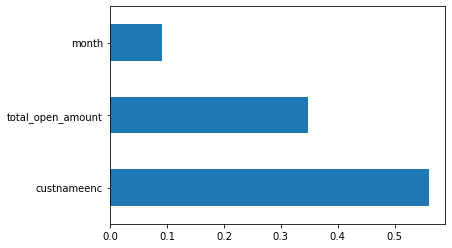

In [52]:
feature_importance=tree_based_feature_importance(X_train,Y_train)

this graph shows how important a feature is in order to derive the result

### Linear Regression

In [53]:
MSE_Score = []
R2_Score = []
Algorithm = []

In [54]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_train,Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

In [55]:
MSE_Score.append(mean_squared_error(Y_test, predicted))
R2_Score.append(r2_score(Y_test, predicted))

### Support Vector Regression

In [56]:
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train,Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

In [57]:
MSE_Score.append(mean_squared_error(Y_test, predicted))
R2_Score.append(r2_score(Y_test, predicted))

### Decision Tree Regressor

In [58]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(X_train,Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

In [59]:
MSE_Score.append(mean_squared_error(Y_test, predicted))
R2_Score.append(r2_score(Y_test, predicted))

### Random Forest Regressor

In [60]:
# Fitting Random Forest to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(X_train,Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

In [61]:
MSE_Score.append(mean_squared_error(Y_test, predicted))
R2_Score.append(r2_score(Y_test, predicted))

### XGB Regressor

In [62]:
# Fitting XGB to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

In [63]:
MSE_Score.append(mean_squared_error(Y_test, predicted))
R2_Score.append(r2_score(Y_test, predicted))

In [64]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithms', 'MSE Score', 'R2 Score'])

In [65]:
Comparison

,Algorithms,MSE Score,R2 Score
0,Linear Regression,112.698729,0.002518
1,Support Vector Regression,113.405958,-0.003742
2,Decision Tree Regressor,143.872508,-0.273398
3,Random Forest Regressor,82.124681,0.273125
4,XGB Regressor,77.280201,0.316003


#### XGB has least MSE so we are taking it as best option

In [66]:
comp=pd.DataFrame(data={'actual': Y_test,'predictions': predicted.astype(int) })
comp.head()

,actual,predictions
29656,-2.0,-2
3502,2.0,-2
12782,0.0,0
35101,0.0,1
24360,-3.0,0


In [67]:
df3 = pd.merge(data, comp, left_index=True, right_index=True)
df3.head()

,cust_number,clear_date,due_in_date,total_open_amount,datedifference,month,custnameenc,date diff bucket,actual,predictions
4,0200729290,2019-01-14,2019-01-14,16967.72,0.0,12,2160,<0,0.0,0
6,0200769623,2019-01-10,2019-01-14,8730.88,-4.0,12,3989,<0,-4.0,-3
7,0200793830,2019-01-07,2019-01-14,35599.61,-7.0,12,2320,<0,-7.0,-1
13,0200706844,2019-01-15,2019-01-14,680.78,1.0,12,4079,0 to 15,1.0,0
17,0200769623,2019-01-09,2019-01-14,505.85,-5.0,12,3995,<0,-5.0,-1


In [68]:
cut_labels = ['<0','0 to 15','15 to 30','30 to 200']
cut_bins =[-200,0,15,30,200]
df3['predicted date diff bucket'] = pd.cut(df3['predictions'], bins=cut_bins, labels = cut_labels)

In [69]:
df3.head()

,cust_number,clear_date,due_in_date,total_open_amount,datedifference,month,custnameenc,date diff bucket,actual,predictions,predicted date diff bucket
4,0200729290,2019-01-14,2019-01-14,16967.72,0.0,12,2160,<0,0.0,0,<0
6,0200769623,2019-01-10,2019-01-14,8730.88,-4.0,12,3989,<0,-4.0,-3,<0
7,0200793830,2019-01-07,2019-01-14,35599.61,-7.0,12,2320,<0,-7.0,-1,<0
13,0200706844,2019-01-15,2019-01-14,680.78,1.0,12,4079,0 to 15,1.0,0,<0
17,0200769623,2019-01-09,2019-01-14,505.85,-5.0,12,3995,<0,-5.0,-1,<0


In [70]:
df3['custname']=name_encoder.inverse_transform(df3['custnameenc'])
df3['predicted clear date']=df3['due_in_date']+pd.to_timedelta(df3['predictions'],unit='d')
df3.drop('custnameenc',axis=1,inplace=True)
df3.drop('datedifference',axis=1,inplace=True)
df3.drop('due_in_date',axis=1,inplace=True)
df3.drop('month',axis=1,inplace=True)
df3.drop('actual',axis=1,inplace=True)
df3.drop('predictions',axis=1,inplace=True)

In [71]:
df3.head()

,cust_number,clear_date,total_open_amount,date diff bucket,predicted date diff bucket,custname,predicted clear date
4,0200729290,2019-01-14,16967.72,<0,<0,KROGER corp,2019-01-14
6,0200769623,2019-01-10,8730.88,<0,<0,WAL-MAR corporation,2019-01-11
7,0200793830,2019-01-07,35599.61,<0,<0,M co,2019-01-13
13,0200706844,2019-01-15,680.78,0 to 15,<0,WINC us,2019-01-14
17,0200769623,2019-01-09,505.85,<0,<0,WAL-MAR us,2019-01-13


In [ ]:
df3.to_csv('results.csv')